#### 1) Создать приложение, которое будет из готового файла с данными «Сбербанка» (https://www.sberbank.com/ru/analytics/opendata) выводить результат по параметрам:  
* Тип данных  
* Интервал дат  
* Область  
  
#### 2) Визуализировать выводимые данные с помощью графика  

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.options.display.max_columns = None
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
link = "http://sbrfdata.ru/opendata.zip"
data = pd.read_csv(link, encoding="cp1251")
data.date = pd.to_datetime(data.date)
data.head()

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


In [3]:
names_list = sorted(list(data['name'].unique()))
regions_list = sorted(list(data['region'].unique()))

In [4]:
def date_to_datetime(date):
    return datetime.datetime.fromisoformat(date)

def get_df_by_condition(data, name, region, later_than_date, before_than_date):
    """
    Example:
        data=data
        name=5
        region=71
        later_than_date="2015-12-31"
        before_than_date="2017-12-31"
    """
    tmp_df = data.loc[(data.name==names_list[name]) & (data.region==regions_list[region])].copy()
    return tmp_df.loc[(tmp_df.date > date_to_datetime(later_than_date)) & (tmp_df.date < date_to_datetime(before_than_date))].copy()

In [5]:
def show_plot(df):
    pylab.rcParams['figure.figsize'] = (12, 6)
    plt.plot(df.date, df.value)
    plt.title(df.name.unique()[0] + " (%s)" % df.region.unique()[0])
    plt.legend()
    plt.show()

In [6]:
print("Доступные \"name\"\'s:\n")
for i, name in enumerate(names_list):
    print(i, "-", name)

Доступные "name"'s:

0 - В среднем депозитов в руб. на человека
1 - В среднем руб. на текущем счете на человека
2 - Количество заявок на ипотечные кредиты
3 - Количество заявок на потребительские кредиты
4 - Количество новых депозитов
5 - Средние расходы по картам
6 - Средние траты в ресторане
7 - Средние траты в ресторане фастфуд
8 - Средний чек в формате Ресторан
9 - Средний чек в формате Фастфуд
10 - Средняя зарплата
11 - Средняя пенсия
12 - Средняя сумма заявки на ипотечный кредит
13 - Средняя сумма заявки на потребительский кредит
14 - Средняя сумма нового депозита


In [7]:
print("Доступные \"region\"\'s:\n")
for i, region in enumerate(regions_list):
    print(i, "-", region)

Доступные "region"'s:

0 - Алтайский край
1 - Амурская область
2 - Архангельская область
3 - Астраханская область
4 - Белгородская область
5 - Брянская область
6 - Владимирская область
7 - Волгоградская область
8 - Вологодская область
9 - Воронежская область
10 - Еврейская автономная область
11 - Забайкальский край
12 - Ивановская область
13 - Иркутская область
14 - Кабардино-Балкарская Республика
15 - Калининградская область
16 - Калужская область
17 - Камчатский край
18 - Кемеровская область
19 - Кировская область
20 - Костромская область
21 - Краснодарский край
22 - Красноярский край
23 - Курганская область
24 - Курская область
25 - Ленинградская область
26 - Липецкая область
27 - Магаданская область
28 - Москва
29 - Московская область
30 - Мурманская область
31 - Ненецкий автономный округ
32 - Нижегородская область
33 - Новгородская область
34 - Новосибирская область
35 - Омская область
36 - Оренбургская область
37 - Орловская область
38 - Пензенская область
39 - Пермский край
40 -

In [8]:
print("Доступные \"date\"\'s:\n")
print("Минимум:", data.date.min())
print("Максимум:", data.date.max())

Доступные "date"'s:

Минимум: 2013-01-15 00:00:00
Максимум: 2019-01-15 00:00:00


#### Example usage of get_df_by_condition():

In [9]:
tst_df = get_df_by_condition(data=data, name=5, region=71, later_than_date="2017-10-10", before_than_date="2018-08-08")
tst_df

,name,region,date,value
58302,Средние расходы по картам,Томская область,2017-10-15,12200
58303,Средние расходы по картам,Томская область,2017-11-15,11895
58304,Средние расходы по картам,Томская область,2017-12-15,13363
58305,Средние расходы по картам,Томская область,2018-01-15,11789
58306,Средние расходы по картам,Томская область,2018-02-15,11137
58307,Средние расходы по картам,Томская область,2018-03-15,12135
58308,Средние расходы по картам,Томская область,2018-04-15,11564
58309,Средние расходы по картам,Томская область,2018-05-15,12375
58310,Средние расходы по картам,Томская область,2018-06-15,12802
58311,Средние расходы по картам,Томская область,2018-07-15,12924


#### Example usage of show_plot():

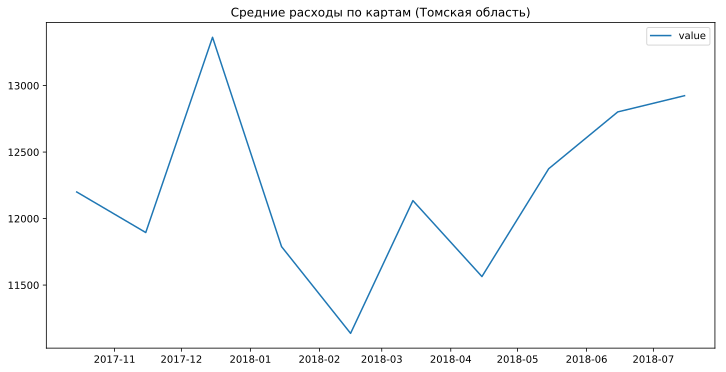

In [10]:
show_plot(tst_df)

### Подставьте требующиеся значения (варианты 'name' и 'region' можно посмотреть выше):

In [11]:
name=9
region=28
later_than_date="2016-10-10"
before_than_date="2019-08-08"

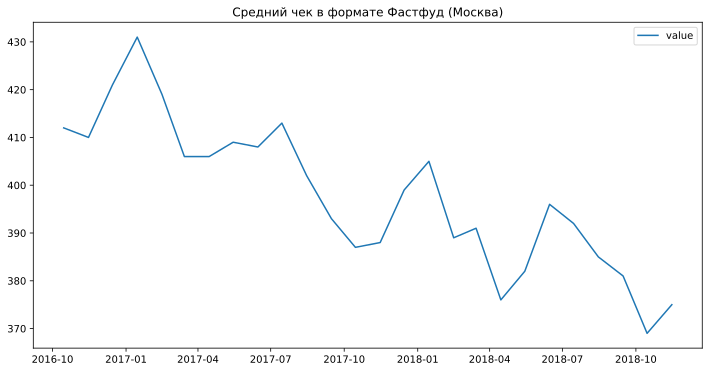

In [12]:
show_plot(get_df_by_condition(data=data, name=name, region=region, later_than_date=later_than_date, before_than_date=before_than_date))